rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|


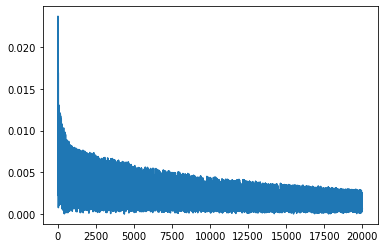

values:
---------------------------
 0.43| 0.55| 0.67| 0.00|
---------------------------
 0.36| 0.00| 0.34| 0.00|
---------------------------
 0.28| 0.14| 0.00|-0.14|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  U  |  L  |


In [1]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
from grid_world import standard_grid, negative_grid
from iterative_policy_evaluation import print_values, print_policy

# NOTE: this is only policy evaluation, not optimization

# we'll try to obtain the same result as our other MC script
from monte_carlo_random import random_action, play_game, SMALL_ENOUGH, GAMMA, ALL_POSSIBLE_ACTIONS

LEARNING_RATE = 0.001

if __name__ == '__main__':
  # use the standard grid again (0 for every step) so that we can compare
  # to iterative policy evaluation
  grid = standard_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # found by policy_iteration_random on standard_grid
  # MC method won't get exactly this, but should be close
  # values:
  # ---------------------------
  #  0.43|  0.56|  0.72|  0.00|
  # ---------------------------
  #  0.33|  0.00|  0.21|  0.00|
  # ---------------------------
  #  0.25|  0.18|  0.11| -0.17|
  # policy:
  # ---------------------------
  #   R  |   R  |   R  |      |
  # ---------------------------
  #   U  |      |   U  |      |
  # ---------------------------
  #   U  |   L  |   U  |   L  |
  policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'U',
    (2, 1): 'L',
    (2, 2): 'U',
    (2, 3): 'L',
  }

  # initialize theta
  # our model is V_hat = theta.dot(x)
  # where x = [row, col, row*col, 1] - 1 for bias term
  theta = np.random.randn(4) / 2
  def s2x(s):
    return np.array([s[0] - 1, s[1] - 1.5, s[0]*s[1] - 3, 1])

  # repeat until convergence
  deltas = []
  t = 1.0
  for it in range(20000):
    if it % 100 == 0:
      t += 0.01
    alpha = LEARNING_RATE/t
    # generate an episode using pi
    biggest_change = 0
    states_and_returns = play_game(grid, policy)
    seen_states = set()
    for s, G in states_and_returns:
      # check if we have already seen s
      # called "first-visit" MC policy evaluation
      if s not in seen_states:
        old_theta = theta.copy()
        x = s2x(s)
        V_hat = theta.dot(x)
        # grad(V_hat) wrt theta = x
        theta += alpha*(G - V_hat)*x
        biggest_change = max(biggest_change, np.abs(old_theta - theta).sum())
        seen_states.add(s)
    deltas.append(biggest_change)

  plt.plot(deltas)
  plt.show()

  # obtain predicted values
  V = {}
  states = grid.all_states()
  for s in states:
    if s in grid.actions:
      V[s] = theta.dot(s2x(s))
    else:
      # terminal state or state we can't otherwise get to
      V[s] = 0

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)

